In [1]:
import numpy as np
import requests
import pandas as pd 
import matplotlib.pyplot as plt


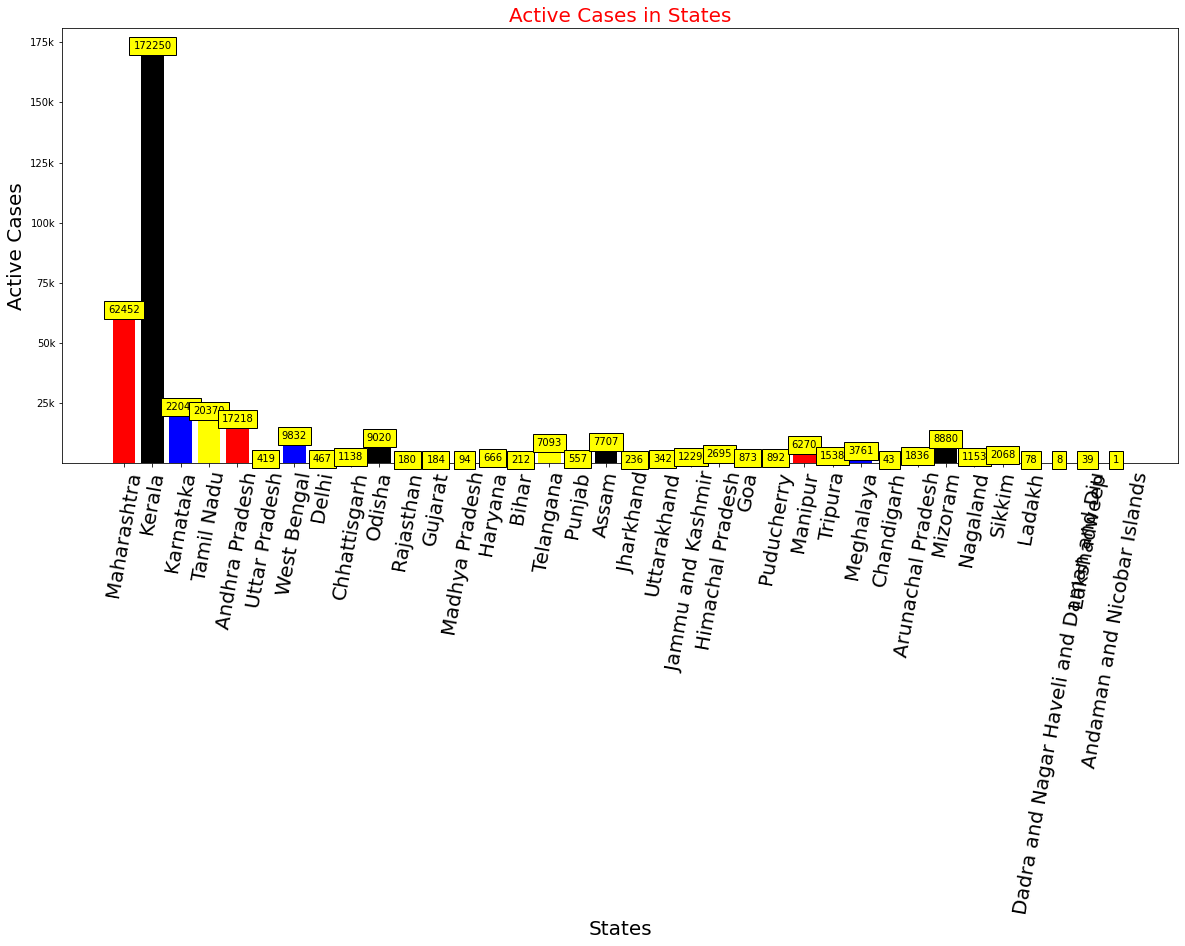

In [49]:
def get_data():
     url = "https://corona-virus-world-and-india-data.p.rapidapi.com/api_india"


     headers = {
     'x-rapidapi-key': "c2d96daf15mshff016f7faac1f93p1d399cjsn0e7e7622dfc7",
     'x-rapidapi-host': "corona-virus-world-and-india-data.p.rapidapi.com"
     }

     return requests.request("GET", url, headers=headers)

def statewise():
     api_response =get_data()
     json = api_response.json()

     df = pd.DataFrame(json)

     df2= df.T

     df2.columns

     df2 = df2.drop(['active', 'confirmed', 'deaths', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'lastupdatedtime', 'migratedother', 'recovered',
       'state', 'statecode', 'statenotes', 'State Unassigned'], axis=1)

     df2.reset_index(drop=True, inplace=False)
     states = list(df2.columns)
     active_X = []
     confirmed_X = []
     death_X=[]
   
     for state in states:
          active_X.append(int(df2[state][2]['active']))
          confirmed_X.append(int(df2[state][2]['confirmed']))
          death_X.append(int(df2[state][2]['deaths']))
     
     plt.figure(figsize=(20,8))
     plt.xlabel("States",fontdict={"fontsize":"20"})
     plt.ylabel("Active Cases",fontdict={"fontsize":"20"})
     plt.title("Active Cases in States",fontdict={"fontsize":"20","color":"red"})
     plt.xticks(rotation=80,fontsize=20)
     plt.yticks([i for i in range(25000,175001,25000)],[str(k)+"k" for k in [i for i in range(25,176,25)]])
     plt.bar(states,active_X,color=["red","black","blue","yellow"])
     for s in range(len(states)):
          plt.text(s,active_X[s],active_X[s],ha='center',bbox=dict(facecolor='yellow',alpha=1))

     
     plt.show()

statewise()
